# СОЦИАЛЬНЫЕ МЕДИА

In [159]:
with open('files/corrected_sents.txt') as f:
    contents = [x.strip() for x in f.readlines()]
with open('files/source_sents.txt') as f:
    source = [x.strip() for x in f.readlines()]

In [160]:
contents[:10]

['очень классная тетка кто бы что ни говорил',
 'Может выгоднее втулку продать и купить колесо в сборе',
 'Довольно большая часть пришедших сходила с дорожек и усаживалась на траву',
 'Симпатичнейшее шпионское устройство такой себе гламурный фотоаппарат девушки Бонда миниатюрная модель камеры Superheadz Clap Camera',
 'Апофеозом дня для меня сегодня стала фраза услышанная в новостях',
 'Ну не было поста так не было',
 'Хотя странно когда я забирала к себе на выходные старого кота который живет у родителей да и собаку в придачу то такого концерта мой кот не устраивал',
 'Думаю что лет через 10 ретроспективно просматривать это будет мне невероятно интересно',
 'Зато я считаю что это будет полезно и для меня и для всех тех кто меня окружает ведь когда расстаешься с человеком на какое-то время то многое становится прозрачным я имею ввиду мы начинаем понимать какое место в нашей повседневности занимает этот человек',
 'Поясним эту мысль']

In [161]:
import seaborn as sns

In [162]:
contents[0]

'очень классная тетка кто бы что ни говорил'

In [163]:
import pandas as pd

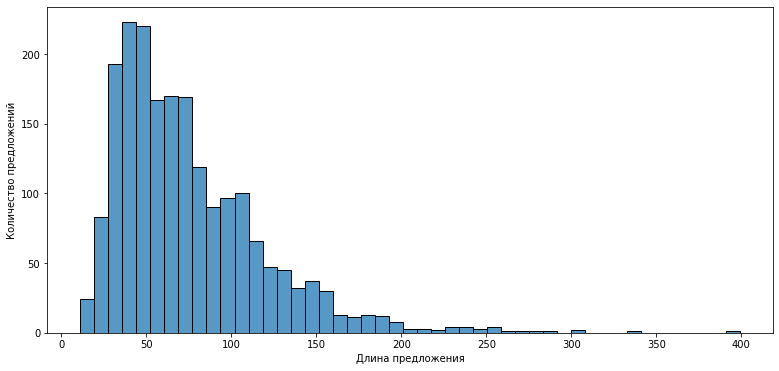

In [164]:
plt.figure(figsize=(13, 6))
ax = sns.histplot([len(item) for item in contents], kde=False)
ax.set(xlabel='Длина предложения', ylabel='Количество предложений');


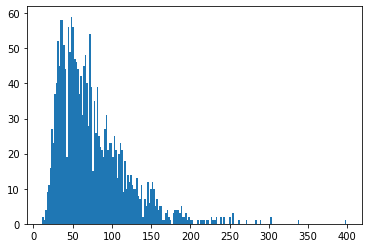

In [165]:
from matplotlib import pyplot as plt
plt.hist(list(map(len,contents)), bins=200);

In [166]:
max(list(map(len,contents)))

399

In [167]:
pd.DataFrame({'source':source, 'target': contents}).to_csv('data/dataset.csv')

In [168]:
with open('files/corr_sample_testset.txt',encoding='utf-8-sig') as f:
    target_social = [x.strip() for x in f.readlines()]
with open('files/test_sample_testset.txt', encoding='utf-8-sig') as f:
    source_social = [x.strip() for x in f.readlines()]

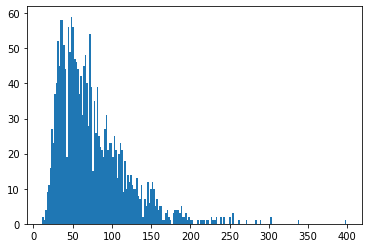

In [169]:
from matplotlib import pyplot as plt
plt.hist(list(map(len,contents)), bins=200);

In [170]:
pd.DataFrame({'source':source_social, 'target': target_social}).drop_duplicates()

,source,target
0,есть у вас оформленый и подписаный мною заказ,есть у вас оформленный и подписанный мною заказ
1,вот в инете откапал такую интеерсную статейку ...,вот в инете откопал такую интересную статейку ...
2,я на всю жизнь запомню свое первое купание в з...,я на всю жизнь запомню свое первое купание в з...
3,думаем что не ошибемся если скажем что выставк...,думаем что не ошибемся если скажем что выставк...
4,судьба человека может складываться очень разно...,судьба человека может складываться очень разно...
...,...,...
2003,спасибо вам огромное за нормальную новость о е...,спасибо вам огромное за нормальную новость о е...
2004,более захватывающее и наглядное обучение возмо...,более захватывающее и наглядное обучение возмо...
2005,и вобщем-то все понятно на фоне слухов застави...,и в общем-то все понятно на фоне слухов застав...
2006,но всему есть придел,но всему есть предел


In [171]:
pd.DataFrame({'source':source_social, 'target': target_social}).to_csv('data/test_dataset.csv')

In [172]:
pd.DataFrame({'source':source, 'target': contents}).to_csv('data/train_mini_dataset.csv')

# СУБТИТРЫ

In [204]:
count =0
subs = []
counts = [0 for i in range(10)]
with open('files/OpenSubtitles.en-ru.ru') as f:
    while True:
        line = f.readline().strip()
        if not line:
            break
        for i in range(10):
            if ((len(line)<=50+i*50) and(len(line)>i*50)):
                if (counts[i]<=6000):
                    subs.append(line)
                    counts[i]+=1
        if((sum(counts))%40000==0):
            print(counts)

In [205]:
sum(counts)

33980

In [206]:
subs = set(subs)

In [207]:
backslash = "\\'"
bad_list = list('*€¬#√@©e') + ['--']+['\xa0']+['ѕереводчики']+['ндхм']+['____________', 'S - s,', 'Z - z']

In [208]:
bad_list

['*',
 '€',
 '¬',
 '#',
 '√',
 '@',
 '©',
 'e',
 '--',
 '\xa0',
 'ѕереводчики',
 'ндхм',
 '____________',
 'S - s,',
 'Z - z']

In [209]:
bad_list
def bad(x):
    for i in bad_list:
        if i in x:
            return False
    return True
subs_ = list(filter(lambda x: bad(x), subs))

In [210]:
subs_ = list(filter(lambda x: bad(x), subs))

In [211]:
subs_

['Тебе пора работать. - Ты о чём?',
 'Но я уверена, ты знаешь, что если ты нас предашь когда-нибудь твой отец первым услышит об этом и первым заплатит за это.',
 'Ши Кён...',
 'Выглядит хорошо.',
 'мне нравится.',
 'Вы знаете, мы могли бы вас вызвать в контору, но начальник сказал: "Пойди, поговори с ним неофициально, может, поладите, тогда и вызывать не придется и дела не будет".',
 'Надеюсь, вы простите меня за вторжение, но будучи управляющим, я ощущаю себя отцом нашей маленькой семьи.',
 'Многие из вас знают меня... Как участника СА... марширующего в рядах... Движения с первых лет его развития.',
 'Они ответили, что направляются на церковную площадь, где примут участие, как и каждый год, в весьма странном, варварском торжестве.',
 'Потому что в каждом, даже в самом тайном делишке всегда отыщется человечек, который что-либо слышал, ...что-либо видел, что-либо знает, ...помнит или догадывается.',
 'Видно, засекли лодку. На тот случай, если вам нужно помочь, мистер Тракрен ваш старый 

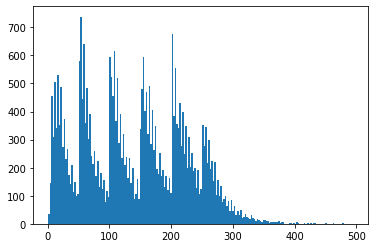

In [212]:
plt.hist(list(map(len,subs)), bins=200);

# Новости

In [213]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anastasiyagavrilova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [214]:
import pandas as pd
df = pd.read_csv('files/news.csv',  usecols=['text'],nrows=20000)

In [215]:
df.head()

,text
0,В 1930-е годы Советский Союз охватила лихорадк...
1,Олимпийская чемпионка по фигурному катанию Ал...
2,Российский врач-диетолог Римма Мойсенко объясн...
3,В 2019 году телеканал «Ю» запустил адаптацию з...
4,Актер Михаил Ефремов систематически употребл...


In [219]:
from unicodedata import normalize
# normalize('NFKD', s)
counts = [0 for i in range(10)]
sents_news = []
for i, text in df.iterrows():
    lines = nltk.tokenize.sent_tokenize(text['text'])
    for line in lines:
        for i in range(10):
            if ((len(line)<=50+i*50) and(len(line)>i*50)):
                if (counts[i]<=2000):
                    sents_news.append(normalize('NFKD', line))
                    counts[i]+=1
                    break
            
    if (sum(counts))>=6*2500:
        break
    if((sum(counts))%3000==0):
        print(counts)

[1932, 2001, 2001, 2001, 729, 216, 61, 33, 13, 13]


In [220]:
# sents = []
# from nltk import tokenize
# for i, text in df.iterrows():
#     sents +=tokenize.sent_tokenize(text['text'])

In [221]:
sents_news = list(set(sents_news));

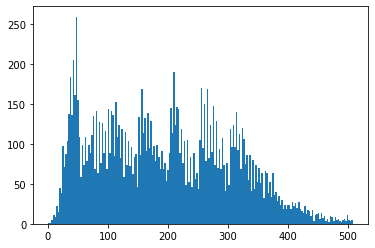

In [222]:
plt.hist(list(map(len,sents_news)), bins=200);

In [223]:
len(sents_news)

14383

# ЛИТЕРАТУРА

In [224]:
df = pd.read_csv('files/zlatoust_paragraph_aligned_with_bleualign.csv', usecols=['source'])
df.head()

,source
0,"— И очень хорошо сделали, что не обратились к ..."
1,"Чужестранец все прохаживался, но, увидев, что ..."
2,"Шипучин. Нет, я не вынесу! (Плачет.) Не вынесу..."
3,"— Очень много, — краснея и с глупой, небрежной..."
4,Вечер и вправду складывался весело.


In [225]:
counts = [0 for i in range(10)]
sents_litre = []
for i, text in df.iterrows():
    lines = nltk.tokenize.sent_tokenize(text['source'])
    for line in lines:
        for i in range(10):
            if ((len(line)<=50+i*50) and(len(line)>i*50)):
                if (counts[i]<=2000):
                    sents_litre.append(normalize('NFKD', line))
                    counts[i]+=1
                    break
#             elif(len(line)>6*50 and len(line)<600):
#                 sents_litre.append(normalize('NFKD', line))

In [226]:
sents_litre = list(set(sents_litre))
sents_litre[:10] 

['«Один раз увидать ее и потом зарыться, умереть», думал он и, делая прощальные визиты, высказал эту мысль Бетси.',
 'Есть другое средство: вы можете отыграться».',
 '– Небось если бы это был вам не чужой человек, а жена... Он угрюмо посмотрел на меня.',
 'Но чем же объяснить, что вы и теперь не хотите поправить причиненное вами зло?',
 '- А вот что-с: во-первых, чтоб он тотчас же выдал свой пистолет, которым он хвастался пред нами, со всеми препаратами.',
 'Она повернулась и медленно пошла из комнаты.',
 'Дошли до Гуровского трактира вместе, а там, где Исторический музей строят, разошлись — он в Александровский сад, по аллее двинул, а я по тротуару, за оградой.',
 'Мимоза, кисейная барышня, слабый пол, ругала она себя.',
 '— Не досадуйте; я смеюсь тому, что вы сами себе враг, и если б вы попробовали, то вам бы и удалось, может быть, хоть бы и на улице дело было; чем проще, тем лучше... Ни одна добрая женщина, если только она не глупа или особенно не сердита на что-нибудь в ту

In [227]:
len(sents_litre)

8691

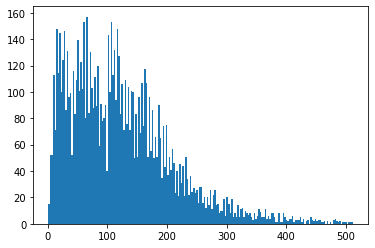

In [229]:
plt.hist(list(map(len,sents_litre)), bins=200);

# GAZETA

In [230]:
import json
with open('gazeta_train.jsonl', 'r') as json_file:
    json_list = list(json_file)
texts = []
for json_str in json_list:
    result = json.loads(json_str)

    texts.append(result['text'])

In [231]:
from nltk import sent_tokenize
sents = []
for text in texts:
    sents+= sent_tokenize(text)

In [232]:
counts = [0 for i in range(10)]
sents_gazeta= []
for line in sents:
    for i in range(10):
        if ((len(line)<=50+i*50) and(len(line)>i*50)):
            if (counts[i]<=8000):
                if line not in sents_gazeta:
                    sents_gazeta.append( line)
                    counts[i]+=1
                    break
#         elif(len(line)>6*50 and len(line)<600):
#             sents_gazeta.append( line)
#     if (sum(counts))>=7*2500:
#         break
    if((sum(counts))%5000==0):
        print(counts)

[614, 1685, 1372, 796, 330, 132, 43, 20, 6, 2]
[1220, 3376, 2728, 1608, 662, 266, 88, 34, 13, 5]
[1753, 5005, 4161, 2420, 1009, 424, 141, 50, 27, 10]
[2284, 6668, 5647, 3188, 1352, 559, 183, 75, 32, 12]
[2889, 8001, 7191, 4083, 1731, 720, 232, 97, 40, 16]
[2889, 8001, 7191, 4083, 1731, 720, 232, 97, 40, 16]
[4188, 8001, 8001, 5775, 2475, 1004, 350, 127, 55, 24]
[4188, 8001, 8001, 5775, 2475, 1004, 350, 127, 55, 24]
[5851, 8001, 8001, 7804, 3305, 1321, 447, 164, 70, 36]
[5851, 8001, 8001, 7804, 3305, 1321, 447, 164, 70, 36]
[8001, 8001, 8001, 8001, 4971, 1948, 685, 243, 101, 48]
[8001, 8001, 8001, 8001, 4971, 1948, 685, 243, 101, 48]
[8001, 8001, 8001, 8001, 4971, 1948, 685, 243, 101, 48]
[8001, 8001, 8001, 8001, 4971, 1948, 685, 243, 101, 48]
[8001, 8001, 8001, 8001, 4971, 1948, 685, 243, 101, 48]
[8001, 8001, 8001, 8001, 4971, 1948, 685, 243, 101, 48]
[8001, 8001, 8001, 8001, 8001, 3183, 1149, 412, 179, 72]
[8001, 8001, 8001, 8001, 8001, 6291, 2352, 866, 344, 142]
[8001, 8001, 8001, 8

In [233]:
sents_gazeta

['Сегодня транспортный налог начисляется в зависимости от мощности автомобиля, причем цена для «сильных» машин выше, чем для малолитражек.',
 'Также ставку налога могут корректировать региональные власти: согласно Налоговому кодексу, базовый тариф, установленный правительством, может быть уменьшен в пять раз или увеличен до 10 раз.',
 'Сборы идут в региональные бюджеты, откуда растекаются на общие нужды.',
 'Транспортный налог — один из основных источников бюджетных доходов — предлагается направить исключительно на дорожные фонды.',
 'Так, автомобилисты будут понимать, за что они платят, а дорожники будут иметь гарантированный доход.',
 'Кроме налога дорожные фонды будут пополняться за счет бюджетных средств и проезда по платным дорогам.',
 'Более того, транспортный налог предлагается завуалировать в акцизы на бензин.',
 'Привычную и раздражающую систему ежегодной оплаты квитанции предлагается изменить, включив налог в стоимость топлива.',
 'Минэкономразвития говорит об удвоении акцизы

# Generate errors

In [234]:
errors = pd.read_csv('files/orfo_and_typos.L1_5+PHON.csv', sep=';')
errors.head()

,CORRECT,MISTAKE,WEIGHT
0,болота,болотро,0.5000
1,болота,балото,0.2652
2,болота,боллото,0.0909
3,болота,болотоэ,0.0909
4,болото,палатаа,0.5000


In [235]:
err = pd.DataFrame(errors.groupby('CORRECT').MISTAKE.apply(list))
err['WEIGHT'] = errors.groupby('CORRECT').WEIGHT.apply(list)
err.head()

,MISTAKE,WEIGHT
CORRECT,,
а,"[п, з, х, н, ъ, йф, йц, ооооо, ёёёёё, нд, кп, ...","[0.6667, 0.5833, 0.5833, 0.5556, 0.5, 0.5, 0.5..."
аб,"[аег, аон, афп, н, алр, алн, тьб, ато, аок]","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]"
аба,"[абыра, амиа, лыба, абфы]","[0.5, 0.5, 0.5, 0.5]"
абажур,"[абожюр, обажур, абажюр, абожур, абвжур, обожур]","[0.5, 0.3333, 0.239, 0.1282, 0.1111, 0.101]"
аббревиатура,"[абревиатюра, абревиатура, абревеатура, абриви...","[0.25, 0.1528, 0.1528, 0.1111, 0.0556, 0.0556,..."


In [236]:
import numpy as np
from numpy.random import choice
def make_error(word):
    x = np.array(err.loc[word, 'WEIGHT'])
    x/x.sum()
    return choice(err.loc[word, 'MISTAKE'], 1,
                  p=x/x.sum())[0]
    

In [237]:
make_error('жить')

'жител'

In [238]:
'жить' in err.index

True

In [239]:
np.random.rand()

0.9652027341031938

In [240]:
from string import ascii_letters

def validate(nickname):
    return all(map(lambda c: c in ascii_letters, nickname))

In [241]:
validate('мааамаа')

False

In [242]:
import numpy as np 
import random

chars = list('йцукенгшщзхъфывапролджэячсмитьбюёЙЦУКЕНГШЩЗХЪЭЖДЛОРПАВЫФЯЧСМИТЬБЮЁ')

def add_spelling_errors(token, error_rate=0.22):
    if (validate(token)): # английские опечатки не исправляем
        return token
    
    assert(0.0 <= error_rate < 1.0)
    if len(token) < 2:
        return token
    rand = np.random.rand()
    if(rand>error_rate):
        return token
    prob = error_rate / 4.0
    if token in err.index:
        return make_error(token) # сделать натуральную ошибку из КартаСЛОВ
    elif rand < prob: # вставка лишнего символа
        random_char_index = np.random.randint(len(token))
        token = token[:random_char_index] + np.random.choice(chars) \
                + token[random_char_index + 1:]
    elif prob < rand < prob * 2: # пропуск символа

        random_char_index = np.random.randint(len(token))
        token = token[:random_char_index] + token[random_char_index + 1:]
    elif prob * 2 < rand < prob * 3: #замена символа
        random_char_index = np.random.randint(len(token))
        token = token[:random_char_index] + np.random.choice(chars) \
                + token[random_char_index:]
    elif prob * 3 < rand < prob * 4: # буквы поменяны местами
        random_char_index = np.random.randint(len(token) - 1)
        token = token[:random_char_index]  + token[random_char_index + 1] \
                + token[random_char_index] + token[random_char_index + 2:]

    return token

def add_errors(sent):
    tokens = sent.split(' ')
#     num_err = random.randint(1, max(1,len(sent)//20))
    for i in range(len(tokens)):
        tokens[i] = add_spelling_errors(tokens[i])
    return ' '.join(tokens)

In [243]:
from random import shuffle
# shuffle(dataset)

In [244]:
dataset =list(sents_litre[:]+sents_news[:]+subs_[:]+sents_gazeta[:])
shuffle(dataset)

In [251]:
len(dataset)

115437

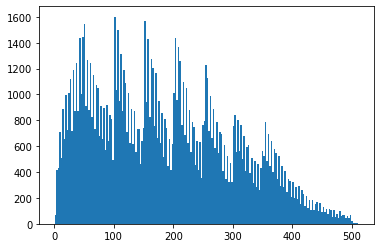

In [245]:
plt.hist(list(map(len,dataset)), bins=200);

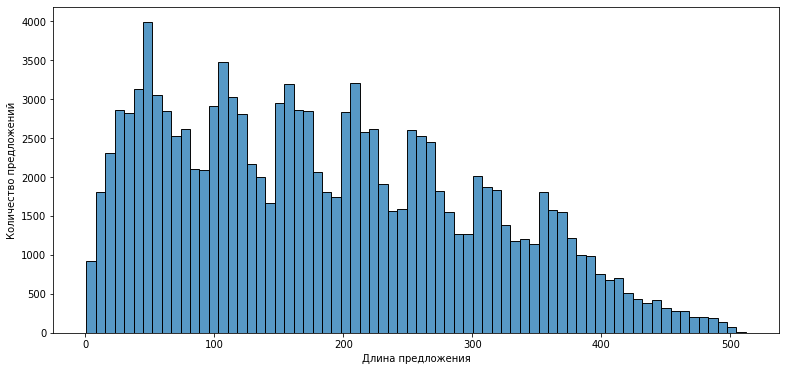

In [246]:
plt.figure(figsize=(13, 6))
ax = sns.histplot([len(item) for item in dataset], kde=False)
ax.set(xlabel='Длина предложения', ylabel='Количество предложений');


In [247]:
bad_list = ['*',
 '€',
 '¬',
 '#',
 '√',
 '@',
 '©',
 'e',
 '--',
 '\xa0',
 'ѕереводчики',
 'ндхм',
 '____________'
           '+',
]

In [248]:
bad_list.append('+')
def bad(x):
    for i in bad_list:
        if i in x:
            return False
    return True
dataset_ = list(filter(lambda x: bad(x), dataset))

In [249]:
dataset = dataset_

In [252]:
dataset 

['Она заблуждается, полагая, что её питомец встал на пути к моей победе, хотя очевидно, что Фисташка — куда более совершенное создание.',
 'Будут обращаться в полицию», – сообщил журналист Дмитрий Егоров.',
 'И это...',
 'В посте от имени Румаса выражаются соболезнования всем пострадавшим протестующим и их семьям.',
 'Зато открывается обширное поле для воображения и домыслов: мол, если приглядеться, то что-то есть загадочное и в портрете бабушки, и в цветочке на подоконнике, и в типичном каталонском пейзаже... Настоящие же загадки (или то, что принято ими считать) появляются в работах Дали значительно позднее, после вхождения в круг парижских сюрреалистов.',
 'Джордж, за всю жизнь не слышала большего вздора. Пытаешься уломать Нелли забрать меня, уговорить меня побыть в комнате.',
 '— Все это справедливо лишь для маленьких детей.',
 'И Мамонов, и его убийца скончались на месте.',
 'Кто-то, очевидно, не любит меня, и они пытаются меня подставить.',
 'Год назад Медведев пригласил нескол

In [253]:
add_errors('Мы привыкли жить под пятой угнетателей.')

'Мы привыкли жинь под пятой угнетателей.'

In [254]:
bad_sents=[]
for sent in dataset:
    bad_sents.append(add_errors(sent))

In [255]:
bad_sents[2115]

'Экс-кандидат в президенты на выборах президента Белоруссии Александр Козулин , который бросил вызов бессменному президенту своей страны, был в том жже годж арестован и осуодён на пять с половиной лет лишения свободы «за злостное хулиганство и организацию массовых беспорядков».'

In [256]:
bad_sents = source+bad_sents

In [257]:
dataset = contents+dataset

In [258]:
pd.DataFrame({'source':bad_sents, 'target':dataset}).drop_duplicates()

,source,target
0,очень классная тетка ктобы что не говорил.,очень классная тетка кто бы что ни говорил
1,Может выгоднее втулку продать и купить колесо ...,Может выгоднее втулку продать и купить колесо ...
2,Довольно большая часть пришедших сходила с дор...,Довольно большая часть пришедших сходила с дор...
3,"Симпатичнейшое шпионское устройство, такой себ...",Симпатичнейшее шпионское устройство такой себе...
4,Опофеозом дня для меня сегодня стала фраза усл...,Апофеозом дня для меня сегодня стала фраза усл...
...,...,...
117432,Намеренно бросал камни с целью уничтожения рек...,Намеренно бросал камни с целью уничтожения рек...
117433,ЧеПрез пать минуШ он выбежал из дома и в зубах...,Через пять минут он выбежал из дома и в зубах ...
117434,"Это будет сдЕелано в августе, уточняла министр.","Это будет сделано в августе, уточняла министр."
117435,"Да, Яебята. Я думаю, я тоже посижу, остануьс в...","Да, ребята. Я думаю, я тоже посижу, останусь в..."


In [259]:
pd.DataFrame({'source':bad_sents, 'target':dataset}).to_csv('data/dataset_small.csv')